In [1]:
import pandas as pd 

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

import seaborn as sns #visualizations

import matplotlib.pyplot as plt #visualizations
plt.style.use('ggplot')

# stats
from scipy.stats import pearsonr
from scipy import stats
import numpy as np 

from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns',100)
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
import graphviz 
from sklearn import tree

from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('../data/IMDB/imdb.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,quality
0,Color,James-Cameron,723,178,0,855,Joel-David-Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH-Pounder,Avatar-,886204,4834,Wes-Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,good
1,Color,Gore-Verbinski,302,169,563,1000,Orlando-Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny-Depp,Pirates-of-the-Caribbean:-At-World's-End-,471220,48350,Jack-Davenport,0,goddess|marriage-ceremony|marriage-proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,good
2,Color,Sam-Mendes,602,148,0,161,Rory-Kinnear,11000,200074175,Action|Adventure|Thriller,Christoph-Waltz,Spectre-,275868,11700,Stephanie-Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,okay
3,Color,Christopher-Nolan,813,164,22000,23000,Christian-Bale,27000,448130642,Action|Thriller,Tom-Hardy,The-Dark-Knight-Rises-,1144337,106759,Joseph-Gordon-Levitt,0,deception|imprisonment|lawlessness|police-offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,very-good
4,?,Doug-Walker,?,?,131,?,Rob-Walker,131,?,Documentary,Doug-Walker,Star-Wars:-Episode-VII---The-Force-Awakens----...,8,143,?,0,?,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,?,?,?,?,?,?,12,7.1,?,0,good


In [3]:
# check column variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5029 non-null   object 
 1   director_name              5029 non-null   object 
 2   num_critic_for_reviews     5029 non-null   object 
 3   duration                   5029 non-null   object 
 4   director_facebook_likes    5029 non-null   object 
 5   actor_3_facebook_likes     5029 non-null   object 
 6   actor_2_name               5029 non-null   object 
 7   actor_1_facebook_likes     5029 non-null   object 
 8   gross                      5029 non-null   object 
 9   genres                     5029 non-null   object 
 10  actor_1_name               5029 non-null   object 
 11  movie_title                5029 non-null   object 
 12  num_voted_users            5029 non-null   int64  
 13  cast_total_facebook_likes  5029 non-null   int64

In [4]:
#check null values for each column 
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
quality                      0
dtype: int64

In [5]:
df.describe(include='all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,quality
count,5029,5029,5029,5029,5029,5029,5029,5029,5029,5029,5029,5029,5.029000e+03,5029.000000,5029,5029,5029,5029,5029,5029,5029,5029,5029,5029,5029,5029.000000,5029,5029.000000,5029
unique,3,2389,529,192,435,907,3020,878,4029,914,2087,4903,NaN,NaN,3509,20,4749,4905,955,48,65,19,435,92,916,NaN,23,NaN,5
top,Color,?,?,90,0,1000,Morgan-Freeman,1000,?,Drama,Robert-De-Niro,Home-,NaN,NaN,?,0,?,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,1,English,USA,R,?,2009,1000,NaN,2.35,NaN,okay
freq,4801,103,48,160,902,126,20,449,877,235,49,3,NaN,NaN,23,2145,151,3,50,4692,3796,2117,487,260,309,NaN,2359,NaN,2774
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.385858e+04,9724.005170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.441360,NaN,7536.179956,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386235e+05,18182.854553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.126039,NaN,19340.294288,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.692000e+03,1421.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.800000,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.444900e+04,3100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.600000,NaN,166.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.648000e+04,13808.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.200000,NaN,3000.000000,NaN


# Data cleaning 

In [6]:
# find all the ? 
result = {}
for col in df.columns:
    result[col] = sum(df[col]=='?')
result

{'color': 19,
 'director_name': 103,
 'num_critic_for_reviews': 48,
 'duration': 15,
 'director_facebook_likes': 103,
 'actor_3_facebook_likes': 23,
 'actor_2_name': 13,
 'actor_1_facebook_likes': 7,
 'gross': 877,
 'genres': 0,
 'actor_1_name': 7,
 'movie_title': 0,
 'num_voted_users': 0,
 'cast_total_facebook_likes': 0,
 'actor_3_name': 23,
 'facenumber_in_poster': 12,
 'plot_keywords': 151,
 'movie_imdb_link': 0,
 'num_user_for_reviews': 21,
 'language': 12,
 'country': 5,
 'content_rating': 297,
 'budget': 487,
 'title_year': 107,
 'actor_2_facebook_likes': 13,
 'imdb_score': 0,
 'aspect_ratio': 322,
 'movie_facebook_likes': 0,
 'quality': 0}

notes  
if you notice, there are (?) in many numeric columns. Such as num_critic_for_reviews duration director_facebook_likes actor_3_facebook_likes

In [7]:
numeric_columns = ['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','title_year','actor_2_facebook_likes','imdb_score','aspect_ratio','movie_facebook_likes']
categorical_columns = list(set(df.columns) - set(numeric_columns))

In [8]:
# replace ? => -1 in numeric columns 
for col in numeric_columns :
    df[col] = df[col].replace("?", -1).astype(float)
    

# Feature engineering

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer
imp = SimpleImputer(missing_values=-1, strategy='median')
imp_result = imp.fit_transform(df[numeric_columns])

imp2 = SimpleImputer(missing_values='?', strategy='most_frequent')
imp_result2 = imp2.fit_transform(df[categorical_columns])

# numeric
df_imp_num = pd.DataFrame(imp_result, columns= numeric_columns)
df_imp_cat = pd.DataFrame(imp_result2, columns= categorical_columns)
df_imp = pd.concat([df_imp_num, df_imp_cat],axis=1)

# compare correlation 
print ('before correlation : ',pearsonr(df['num_critic_for_reviews'], df['director_facebook_likes']))
print('after correlation : ',pearsonr(df_imp['num_critic_for_reviews'], df_imp['director_facebook_likes']))

before correlation :  (0.18458178511827408, 8.771449352158274e-40)
after correlation :  (0.18335609642273853, 2.8540613375980857e-39)


I guess, the impulation works well. As it can be seen from the correlation result (cmiiw)

In [10]:
# genre, convert genre into column 
df_imp['genres'] = df_imp['genres'].str.lower()
df_imp['genres_list'] = df_imp['genres'].apply(lambda x:x.split('|'))
df_genre = pd.get_dummies(df_imp['genres_list'].explode()).reset_index().groupby('index').sum()

df_imp = pd.concat([df_imp, df_genre],axis=1)

In [11]:
# convert quality to ordinal 
dict_quality = {'very-good':5,'good':4,'okay':3,'bad':2,'very-bad':1}
df_imp['qualilty_c'] = df_imp['quality'].apply(lambda x:dict_quality[x]) #for loop replacement 

In [12]:
# quality and immdb score has high correlation, must drop one of them 
df_imp.head()

pearsonr(df_imp['qualilty_c'],df_imp['imdb_score'])

(0.8978895445341339, 0.0)

In [13]:
# remove unnecessary columns 
delete_columns = ['imdb_score','actor_3_name','color','language','genres_list','country','country','quality','actor_2_name','actor_1_name','plot_keywords','director_name','genres','movie_title','content_rating','movie_imdb_link']
df_imp.drop(delete_columns,axis=1,inplace=True)

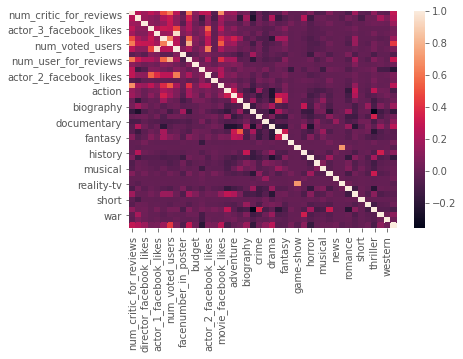

In [14]:
# check correlation 
sns.heatmap(df_imp.corr())

# Split data 

In [15]:
X = df_imp.drop('qualilty_c',axis=1) #independent variablle 
y = df_imp['qualilty_c'] #dependent variable 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,reality-tv,romance,sci-fi,short,sport,thriller,war,western
1426,238.0,109.0,87.0,923.0,15000.0,55802754.0,270228.0,20956.0,2.0,194.0,35000000.0,2011.0,3000.0,2.35,41000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5026,81.0,110.0,107.0,45.0,576.0,136007.0,3924.0,776.0,1.0,39.0,4500.0,2004.0,133.0,2.35,171.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
436,191.0,101.0,293.0,1000.0,11000.0,242589580.0,296904.0,21276.0,1.0,604.0,81000000.0,2003.0,7000.0,1.85,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2505,62.0,99.0,17.0,826.0,918.0,24708699.0,7991.0,4797.0,7.0,30.0,20000000.0,2010.0,912.0,2.35,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
912,558.0,157.0,0.0,304.0,1000.0,95720716.0,216032.0,2759.0,0.0,640.0,40000000.0,2012.0,1000.0,1.85,39000.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# Apply decision tree 

In [17]:
decision_tree = DecisionTreeClassifier(random_state=50)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=50)

In [18]:
# prediction and f1 score 
y_pred = decision_tree.predict(X_test)
f1_score(y_test,y_pred,average='micro')

0.5911199469847581

In [19]:
# confussion matrix
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
df_confusion

Predicted,1,2,3,4,5
Actual,,,,,
1,0,6,7,2,0
2,2,43,59,10,2
3,7,88,565,179,16
4,0,15,139,244,35
5,0,3,10,37,40


In [20]:
# feature importance high to low 
sorted(zip(X_train.columns, decision_tree.feature_importances_), key = lambda x: x[1], reverse=True)

[('num_voted_users', 0.20175848224218978),
 ('title_year', 0.07675381805397374),
 ('duration', 0.07472795993024094),
 ('budget', 0.07438719356799081),
 ('num_user_for_reviews', 0.06388351996962888),
 ('num_critic_for_reviews', 0.05915921795134913),
 ('gross', 0.05580196048054936),
 ('cast_total_facebook_likes', 0.04041623557164652),
 ('actor_3_facebook_likes', 0.038712147710546825),
 ('movie_facebook_likes', 0.03818254971754079),
 ('actor_2_facebook_likes', 0.03746394804089703),
 ('director_facebook_likes', 0.034503487934778324),
 ('drama', 0.03194113510808243),
 ('actor_1_facebook_likes', 0.027522137782114715),
 ('facenumber_in_poster', 0.020608961401854857),
 ('documentary', 0.01792694641296505),
 ('aspect_ratio', 0.01601190040623494),
 ('biography', 0.008419253772303207),
 ('action', 0.008235517291351718),
 ('comedy', 0.008066340865947904),
 ('romance', 0.007708451063169675),
 ('animation', 0.007424574877010461),
 ('horror', 0.006774113018473176),
 ('fantasy', 0.006647582145238627),

In [21]:
# tree visualization 
# this is quite heavy 

# dot_data = tree.export_graphviz(decision_tree, out_file=None, 
#         feature_names=X_train.columns,  
#         class_names='qualilty_c',  
#         filled=True, rounded=True,  
#         special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph

# Model tuning 
https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

In [22]:
#default model parameter 
decision_tree

DecisionTreeClassifier(random_state=50)

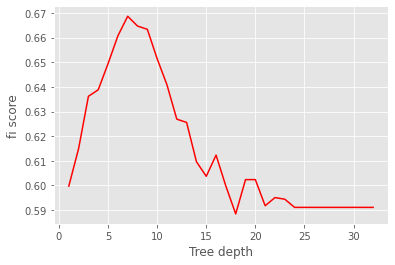

In [23]:
# max depths
max_depths = np.linspace(1, 32, 32, endpoint=True)

test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth,random_state=50)
    dt.fit(X_train, y_train)   
    y_pred = dt.predict(X_test)
    f1_result = f1_score(y_test,y_pred,average='micro')
    test_results.append(f1_result)
    
line2, = plt.plot(max_depths, test_results, 'r', label="f1 score")
plt.ylabel('fi score')
plt.xlabel('Tree depth')
plt.show()

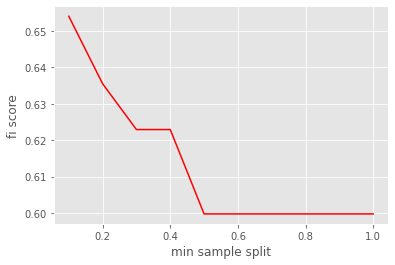

In [24]:
# min samples splits
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True,)
test_results = []
for min_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_split, random_state=50)
    dt.fit(X_train, y_train)   
    y_pred = dt.predict(X_test)
    f1_result = f1_score(y_test,y_pred,average='micro')
    test_results.append(f1_result)
    
line2, = plt.plot(min_samples_splits, test_results, 'r', label="f1 score")
plt.ylabel('fi score')
plt.xlabel('min sample split')
plt.show()

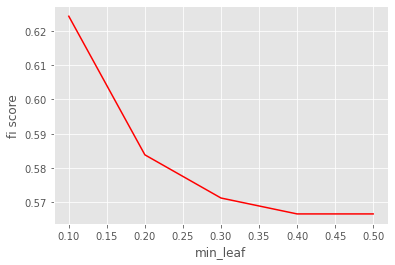

In [25]:
# min sample leafs

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

test_results = []
for min_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_leaf,random_state=50)
    dt.fit(X_train, y_train)   
    y_pred = dt.predict(X_test)
    f1_result = f1_score(y_test,y_pred,average='micro')
    test_results.append(f1_result)
    
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="f1 score")
plt.ylabel('fi score')
plt.xlabel('min_leaf')
plt.show()

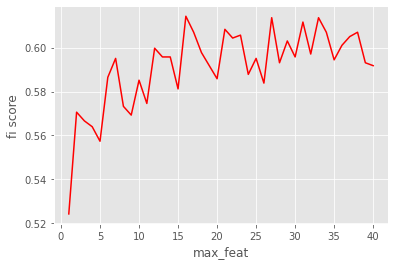

In [26]:
# max features
max_features = list(range(1,X_train.shape[1]))

test_results = []
for max_feat in max_features:
    dt = DecisionTreeClassifier(max_features=max_feat,random_state=50)
    dt.fit(X_train, y_train)   
    y_pred = dt.predict(X_test)
    f1_result = f1_score(y_test,y_pred,average='micro')
    test_results.append(f1_result)
    
line2, = plt.plot(max_features, test_results, 'r', label="f1 score")
plt.ylabel('fi score')
plt.xlabel('max_feat')
plt.show()

# summary model tuning 
max_depths = 8 | f1 score = 0.66  
min_samples_splits = 0.1  | f1 score = 0.62  
min_samples_leafs = 0.1   
max_features = 16 | f1 score = 0.61

In [27]:
# retrain the model by using tuning parameter 
dt = DecisionTreeClassifier(max_depth=8, max_features= 16, random_state=50)
dt.fit(X_train, y_train)   
y_pred = dt.predict(X_test)
print('f1 score after fine tuning {}'.format(f1_score(y_test,y_pred,average='micro')))

f1 score after fine tuning 0.655400927766733


# K fold 

In [28]:
kf = KFold(n_splits=10)
f1_score_result = []
for train_index, test_index in kf.split(X,y):
    dt = DecisionTreeClassifier(max_depth=8, max_features= 16, random_state=50)
    dt.fit(X.iloc[train_index],y[train_index])   
    y_pred = dt.predict(X.iloc[test_index])
    print('f1 score after fine tuning {}'.format(f1_score(y.iloc[test_index],y_pred,average='micro')))
    f1_score_result.append(f1_score(y.iloc[test_index],y_pred,average='micro'))
    
print('mean k fold f1 score {} '.format(np.mean(f1_score_result)))

f1 score after fine tuning 0.6341948310139165
f1 score after fine tuning 0.6660039761431411
f1 score after fine tuning 0.705765407554672
f1 score after fine tuning 0.6819085487077535
f1 score after fine tuning 0.6341948310139165
f1 score after fine tuning 0.6302186878727635
f1 score after fine tuning 0.6520874751491054
f1 score after fine tuning 0.5487077534791253
f1 score after fine tuning 0.5646123260437376
f1 score after fine tuning 0.549800796812749
mean k fold f1 score 0.626749463379088 


# conclusion 
After many effort with machine learning and data. It conclude that decision tree only capable reach average f1 score around 0.62 until 0.65.  
Solution, try another machine learning model, for example bagging(random forest), neural network, svm, and so on. 